In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data:

In [2]:
df = pd.read_csv("./promise_nfr.csv", sep=";")

In [3]:
print("Number of instances:", df.shape[0])

Number of instances: 625


In [4]:
df.sample(5)

,number,ProjectID,RequirementText,class,NFR,F,A,FT,L,LF,MN,O,PE,PO,SC,SE,US
434,435,8,The system shall notify customers of changes t...,SE,1,0,0,0,0,0,0,0,0,0,0,1,0
556,557,12,The product shall provide GUI based Monitoring...,LF,1,0,0,0,0,1,0,0,0,0,0,0,0
192,193,4,The Disputes System shall prevent the creation...,F,0,1,0,0,0,0,0,0,0,0,0,0,0
569,570,12,The product shall be able to process all trans...,SC,1,0,0,0,0,0,0,0,0,0,1,0,0
118,119,3,The system shall be able to display a report o...,F,0,1,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.rename(columns={"number": "id", "RequirementText": "text"}, inplace=True)

In [6]:
df["label"] = df["class"].apply(lambda x: 1 if x=="F" else 0)

### Clean the data:

In [7]:
print("Number of missing texts:", df["text"].isnull().sum())

Number of missing texts: 0


In [8]:
print("Number of missing labels:", df["label"].isnull().sum())

Number of missing labels: 0


In [9]:
print(f"Number of duplicated texts: {df["text"].duplicated().sum()} ({df["text"].duplicated().sum()/df.shape[0]:.2%})")

Number of duplicated texts: 2 (0.32%)


### Analyze distributions:

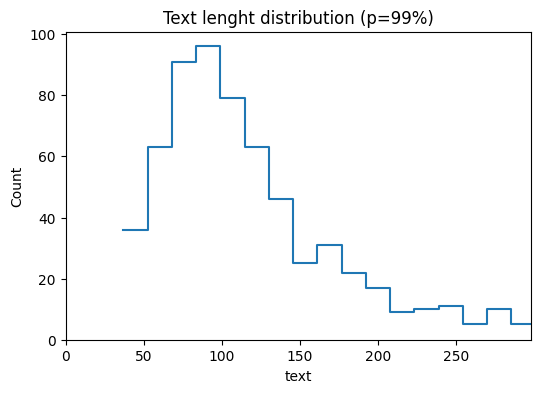

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(df["text"].str.len(), element="step", fill=False)
plt.xlim([0, df["text"].str.len().quantile(.99)])
plt.title("Text lenght distribution (p=99%)")
plt.show()

In [11]:
df["label"].value_counts(dropna=False, normalize=True).round(2)

label
0    0.59
1    0.41
Name: proportion, dtype: float64

### Persist datasets:

In [12]:
df[["id", "text", "label"]].to_parquet("./requirement_type.parquet", index=False)

In [13]:
print("Number of instances in the persisted dataset:", df.shape[0])

Number of instances in the persisted dataset: 625
